# Hands On Astropy Tutorial 
**Tutors:** Axel Donath and Johannes King

This hands-on tutorial gives an introduction and overview of the [Astropy](http://www.astropy.org/) Python package for astronomy.

## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. Every sub-topic we will cover in this tutorial will be concluded by a few **exercises with different levels of difficulty** (*easy*, *advanced* and *hard*). We will give you **~15-20 min to solve the exercises** and present a possible solution afterwards. In case we don't have time to show all the solutions or in the likely case that you don't manage to solve all of them: we will provide a **sample solution** for all exercises **after the course**.   

The estimated time for this tutorial is ~2 hours. Feel free to **interrupt at any time** to ask questions or **talk to the assisting tutors** when you encounter errors or the code doesn't work as expected.

We have marked some of the sections that deal with more advanced topics as "optional". 

The material presented here is partly based on: 

- Astropy [documentation](http://docs.astropy.org/en/stable/index.html) webpage
- Notebooks provided in the [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository
- And the [Astropy Introduction for Gammapy Users](https://github.com/gammapy/gammapy-extra/blob/master/notebooks/astropy_introduction.ipynb) notebook

As the content that can be covered in this ~2 hour tutorial is very limited, we recommend to also **check-out the ressources** listed above after the school.

We're happy to receive any **feedback or questions** on the tutorial via mail to *axel.donath@mpi-hd.mpg.de* or using the 
repository's [issue tracker](https://github.com/Asterics2020-Obelics/School2017/issues). 

## What is Astropy?

![](astropy_banner_96.png)

    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages."


The concept and structure of the package is decribed in more detail in the [Astropy paper 2013](http://adsabs.harvard.edu/abs/2013A%26A...558A..33A).

The **Astropy package is structured into several submodules** and we will cover (what we consider) the most important of them in the following order:

1. [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantities](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

2. [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

4. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).

5. (optional) Plotting of astronomical sky images with [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/)
6. (optional) Define regions in the sky with the [regions](http://astropy-regions.readthedocs.io/en/latest/getting_started.html) package

In addition to the Astropy core package there is an infrastructure of  [Astropy affiliated packages](http://www.astropy.org/affiliated/) dedicated to specific fields of Astronomy or analysis tasks:


You can **get help** on Astropy beyond this course via the following channels:

- [Astropy mailing list](https://mail.scipy.org/mailman/listinfo/astropy) (for general questions / help)
- [Astropy gitter channel](https://gitter.im/astropy/astropy) (for quick questions / chat)
- [Astropy issue tracker](https://github.com/astropy/astropy/issues) (for questions / bug reports)

If you would like to contribute to Astropy, please read the [contribute page](http://www.astropy.org/contribute.html)
on the website.

Let's start with the setup and check of the notebook:

## 0. Setup

Check package versions. All examples should work with Astropy > 1.3 and Numpy > 1.11

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.12.1
astropy: 2.0.dev18429


## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

### 1.1. Basics
The recommended way to import the `astropy.units` submodule is: 

In [3]:
from astropy import units as u

`Quantities` are created by multiplying any number, list or array with a unit object. Check the availabe units with tab completion on the units module, `u.<TAB>`.

In [4]:
distance = 1. * u.lightyear
print(distance)

1.0 lyr


Quantities can be also created using lists and arrays:

In [5]:
distances = [1, 3, 10] * u.lightyear
print(distances)

distances = np.array([1, 3, 10]) * u.lightyear
print(distances)

[  1.   3.  10.] lyr
[  1.   3.  10.] lyr


The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [6]:
distances.value
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [7]:
distance.unit
type(distances.unit)

astropy.units.core.Unit

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [8]:
distances * 10

<Quantity [  10.,  30., 100.] lyr>

Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [9]:
distance.to('meter')

<Quantity 9460730472580800.0 m>

In [10]:
distance.to(u.parsec)

<Quantity 0.3066013937879527 pc>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [11]:
speed_of_light = distance / u.year
print(speed_of_light.to('km/s'))

299792.458 km / s


In [12]:
print(speed_of_light.to('angstrom/day'))

2.5902068371199996e+23 Angstrom / d


For standardized unit systems such as 'si' or 'cgs' there are convenience attributes on the quantity object:

In [13]:
speed_of_light.si

<Quantity 299792458.0 m / s>

In [14]:
speed_of_light.cgs

<Quantity 29979245799.999992 cm / s>

### 1.2. Equivalencies

In Astronomy and other fields of physics quantities are often measured in more practical units, which are equivalent to the actual physical unit. In `astropy.units` this is handle with the concept of "equivalencies".  

In [15]:
u.spectral()

[(Unit("m"),
  Unit("Hz"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("m"),
  Unit("J"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("Hz"),
  Unit("J"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>,
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("m"),
  Unit("1 / m"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("Hz"),
  Unit("1 / m"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>,
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("J"),
  Unit("1 / m"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>,
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("1 / m"),
  Unit("rad / m"),
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>,
  <function astropy.units.equivalencies.spectral.<locals>.<lambda>>),
 (Unit("m"),
  Unit("rad / 

### 1.3 Constants

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants]() submodule:

In [16]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

### 1.4 Interfacing quantities with third-party code (optional) 

When writing code that uses quantities we are typically bound to use it everywhere in the code. But often we'd like to interface with functions (e.g. from scipy or matplotlib) or other third-party code that doesn't know how to handle quantities.

For matplotlib, Astropy has a builtin support:

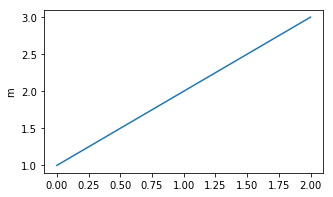

In [17]:
from astropy.visualization import quantity_support

with quantity_support():
    plt.figure(figsize=(5, 3))
    plt.plot([1, 2, 3] * u.m)

But in other cases there is only the option to convert the quantity to well defined units, strip off the unit and re-attach it after the computation:

In [18]:
emin, emax = [1, 10] * u.TeV
energies = np.logspace(np.log10(emin.value), np.log10(emax.value), 10) * emin.unit
print(energies)

[  1.           1.29154967   1.66810054   2.15443469   2.7825594
   3.59381366   4.64158883   5.9948425    7.74263683  10.        ] TeV


### 1.5 Exercises

- (*easy*) How long does the light travel from the sun to the earth in minutes? How long does the light travel from the Galactic center (assume a distance of 8 kpc) in years? 
- (*advanced*) Define a new unit called `"baro-meter"`, which is eqivalent to 25 cm and use it to measure the height of the empire state building (for other ways to measure the height of a building using a barometer see [barometer question on Wikipedia](https://en.wikipedia.org/wiki/Barometer_question)...)
- (*expert*) Integrate something...

## 2. Coordinates

With the submodule [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


### 2.1 Basics
The basic class to handle sky coordinates is [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html):

In [19]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [20]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.63,  22.01)>


Alternatively the angles can be specified as string:

In [21]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10', unit=(u.hour, u.deg), frame='icrs')

Where in the first case the unit doesn't have to specified because it is encoded in the string via `'hms'` and `'dms'`.

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [22]:
SkyCoord.from_name('Crab')


<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.6332124,  22.0144601)>

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [23]:
position_crab.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    ( 184.55754381, -5.78427369)>

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [24]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    ( 184.55754381, -5.78427369)>

In [25]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.63320833,  22.01447222)>

To access the `longitude` and `latitude` angles individually: 

In [26]:
position_crab.data.lon


<Longitude 5.575547222222222 hourangle>

In [27]:
position_crab.data.lat

<Latitude 22.01447222222222 deg>

### 2.2 Measuring distances between positions in the sky
The angular distance between two [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) objects, can be found using the [separation](docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) method:

In [28]:
position_saga = SkyCoord.from_name('Sag A*')
position_saga = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

position_crab.separation(position_saga)

<Angle 172.64076196501316 deg>

### 2.3 ALT - AZ coordinates (optional)

In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time

In [29]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

We define a location using [EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html):

In [30]:
paris = EarthLocation(lat=48.8567 * u.deg, lon=2.3508 * u.deg)
print(paris.geodetic)

(<Longitude 2.3508 deg>, <Latitude 48.8567 deg>, <Quantity 7.260544597042039e-10 m>)


and a time using [Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html)

In [31]:
now = Time.now()
print(now)
print(now.mjd)

2017-06-01 15:32:19.609161
57905.647449180105


Now we can define a horizontal coordinate system using [AltAz]([docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) and use it to convert a sky coordinate

In [32]:
altaz = AltAz(obstime=now, location=paris)
crab_altaz = position_crab.transform_to(altaz)
print(crab_altaz)

<SkyCoord (AltAz: obstime=2017-06-01 15:32:19.609161, location=(4200910.643257838, 172456.78503911156, 4780088.658775934) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    ( 246.16316249,  47.45006836)>


### 2.4 Exercises

- (*easy*) Define the sky coordinate for your favorite object and find the distance to the crab nebula and Galactic center.
- (*advanced*) ?? 
- (*expert*) Make a plot of the height above horizon vs.time for the crab position at the location of Annecy. Mark the the time range where it is visible.

## 3. Tables

astropy provides the [Table](http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Table.html) class in order to handle data tables

### 3.1 Basics

Table objects can be created as shown in the following

In [33]:
from astropy.table import Table

In [34]:
table = Table()

We add columns to the table like we would add entries to a dictionary

In [35]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A']
table['GLON'] = [184.55754381, 0, 111.74169477] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151] * u.deg

In [36]:
table

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


### 3.2 Accessing rows an columns

We have access to the defined columns

In [37]:
table.colnames

['Source_Name', 'GLON', 'GLAT']

and can look a individual columns

In [38]:
table['GLON']

184.55754381
0.0
111.74169477


and also subsets of columns

In [39]:
table[['Source_Name', 'GLON']]

Source_Name,GLON
,deg
str6,float64
Crab,184.55754381
Sag A*,0.0
Cas A,111.74169477


Often, it is handy to get the column data as [astropy.units.Quantity]()

In [40]:
table['GLON'].quantity

<Quantity [ 184.55754381,   0.        , 111.74169477] deg>

Rows can be accessed using numpy indexing

In [41]:
table[0:2]

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0


another useful featuer for quick look access is the [show_in_browser]() function

In [42]:
table.show_in_browser(jsviewer=True)

### 3.3 Data selection 

Most of the time, one is only interested in a subset of the data contained in a table. Data selection is most easily achieved using [np.where](). There is also a more sophisticated indexing scheme, which is explained [here](http://docs.astropy.org/en/stable/table/indexing.html).

In [43]:
selection = np.where(table['Source_Name'] == 'Crab')
table[selection]

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369


### 3.4 Reading/Writing tables to disk
astropy tables can be serialized into many formats. For an overview see [here](http://docs.astropy.org/en/latest/io/unified.html#built-in-table-readers-writers)

In [44]:
table.write('data/example.fits', overwrite=True, format='fits')

In [45]:
table.write('data/example.ecsv', overwrite=True, format='ascii.ecsv')

In [46]:
table.read('data/example.fits')

Source_Name,GLON,GLAT
,deg,deg
str6,float64,float64
Crab,184.55754381,-5.78427369
Sag A*,0.0,0.0
Cas A,111.74169477,-2.13544151


### 3.5. Miscellaneous

These are common operations when operating with tables

In [47]:
table.sort('GLON')

In [48]:
table.remove_row(0)

In [49]:
for row in table:
    print(row['Source_Name'])

Cas A
Crab


### 3.6 Exercises

- (*easy*) Add columns with the `RA` and `DEC` coordinates of the objects to the example table.
- (*advanced*) Load the example table `fermi_2fhl.fits`. Find all sources within 1 deg from the crab.
- (*expert*) Load the table `fermi_2fhl.fits` and make an all sky plot of the source positions.

## 4. FITS Images and WCS

The [flexible image transport system](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images and tables. As example we will use image data of the supernova remnant [Cassiopeia A](https://en.wikipedia.org/wiki/Cassiopeia_A), taken by the [Chandra X-ray observatory](http://chandra.harvard.edu/).

### 4.1 Basics


In [50]:
from astropy.io import fits

To open the fits file we use `fits.open()`:

In [51]:
hdulist = fits.open('data/casa_0.5-1.5keV.fits.gz')

And retrieve some basic information on the  header data unit (HDU) by calling `.info()`:

In [52]:
hdulist.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      26   (1024, 1024)   float32   


We see it contains only one `PrimaryHDU` with data dimensions `(1024, 1024)` and format `float32`. As the name suggest

In [53]:
image_hdu = hdulist['PRIMARY']

We can access the data with the `.data` attribute:

In [54]:
image_hdu.data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

It is a plain 2d numpy array. We use `plt.imshow()` to visualize it:

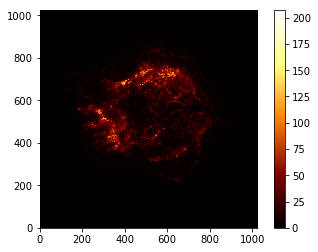

In [55]:
plt.imshow(image_hdu.data, origin='lower', cmap='afmhot')
plt.colorbar()

In [56]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

In [57]:
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel, pixel_to_skycoord

In [58]:
wcs = WCS(image_hdu.header)

In [59]:
pixel_to_skycoord(10, 10, wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 350.99856802,  58.74321775)>

### 4.2 Exercises

- (*easy*) 
- (*advanced*) Sum up all the data within a circle of X deg around the position of. You can use [np.indices()]() you can get arrays of x and y pixel positions 
    
- (*hard*) Find the sky position of the brightest pixel in the data. You can use e.g. [np.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

## 5. Plotting of sky images (optional)

### 5.1 Exercises

- (*easy*)
- (*advanced*) Make a combined RGB image of the Chandra data in different energy bands. You can use e.g. [make_lupton_rgb](http://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html#astropy.visualization.make_lupton_rgb)
- (*expert*) 

## Acknowledgements
![](asterics_log.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).